In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#pd.set_option('display.max_rows', None)
from yellowbrick.regressor import ResidualsPlot, PredictionError

In [5]:
df = pd.read_csv('/Users/siljaloik/Desktop/Final_project/data_printout3.csv')

In [6]:
df.head(10)

,Unnamed: 0,artist,album_title,ratings,community_rating,no_of_have,no_of_want,ratio_community,record_condition,sleeve_condition,label,seller,av_seller_rating,ships_from,release_country,year,record_age,genre,style,tracks,b_side,no_of_records,format_,usd_price
0,0,Crystal Distortion,The Things I4m Not Supposed To Do,1992,4.17,327,100,0.31,Very Good (VG),Generic,Expressillon,fendersDE,99.80,Germany,France,2004,17,Electronic,Breakbeat,5,1,2,Other,8.92
1,1,Kristine W,Land Of The Living,1776,4.67,19,32,1.68,Near Mint (NM or M-),Very Good Plus (VG+),Champion,discomany,100.00,Italy,UK,1996,25,Electronic,House,9,1,1,LP,80.77
2,2,DJ Katch,The Horns / Ends Up,33,4.00,32,25,0.78,Mint (M),Mint (M),Not On Label (DJ Katch Self-released),RILLENTRAEGER,100.00,Germany,Germany,2018,3,Electronic,Instrumental,2,0,1,"7""",83.18
3,3,Sunkids Featuring Chance,Rise Up,438,4.34,540,185,0.34,Very Good Plus (VG+),Near Mint (NM or M-),Yellorange,waldweg,100.00,Germany,US,2000,21,Electronic,House,4,0,2,Other,11.89
4,4,Salt 'N' Pepa,Gitty Up,545,3.80,39,15,0.38,Mint (M),Generic,FFRR,UNDERTOW_1992,99.80,Germany,UK,1998,23,Electronic,RnB/Swing,1,1,1,"12""",2.08
5,5,Alta Frecuencia,Cruzando La Linea,100,3.67,6,1,0.17,Very Good Plus (VG+),Very Good Plus (VG+),CBS,AsiEmpezoLaCosa,100.00,Colombia,Venezuela,1984,37,Rock,ClassicRock,7,1,1,LP,19.55
6,6,Trapped Under Ice,Stay Cold,11,4.75,150,49,0.33,Near Mint (NM or M-),Very Good (VG),Reaper Records (2),xheimathafenx,100.00,Germany,US,2010,11,Rock,Hardcore,5,1,1,"7""",13.09
7,7,Generation Dub,Atomic,14,3.76,189,19,0.10,Very Good (VG),Generic,Reformed Recordings,TimTheEnchanter,100.00,United Kingdom,UK,2004,17,Electronic,DrumnBass,1,0,1,"12""",0.35
8,8,D.E.O.,1977 EP,9095,4.57,299,792,2.65,Very Good Plus (VG+),Very Good Plus (VG+),Hydraulic Records,dannygnr8,99.56,United Kingdom,US,1997,24,Electronic,Electro,3,1,1,"12""",27.79
9,9,Robert John,Sad Eyes,740,4.20,19,1,0.05,Very Good (VG),Generic,EMI America,musiclraider,99.40,United Kingdom,US,1979,42,Pop,Ballad,2,0,1,"7""",2.78


In [7]:
df.shape

(16675, 24)

## Dropping columns that are unnecessary

In [8]:
df.drop(['Unnamed: 0','artist', 'album_title', 'label','seller','ships_from','release_country','style'], axis=1, inplace=True)

In [9]:
df.shape

(16675, 16)

# Explore the target column

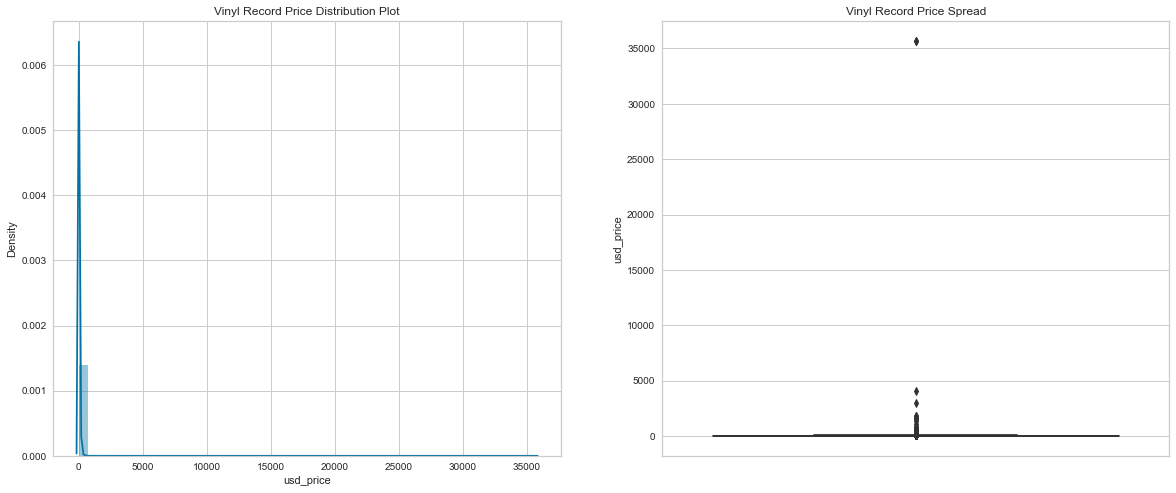

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Vinyl Record Price Distribution Plot')
sns.distplot(df.usd_price)

plt.subplot(1,2,2)
plt.title('Vinyl Record Price Spread')
sns.boxplot(y=df.usd_price)

plt.show()

# Outliers

## Target outliers

In [11]:
#more conventional method - did not drop any rows
iqr = np.percentile(df['usd_price'],75) - np.percentile(df['usd_price'],25)
upper_limit = np.percentile(df['usd_price'],75) + 3*iqr
lower_limit = np.percentile(df['usd_price'],25) - 3*iqr
data = df[(df['usd_price']>lower_limit) & (df['usd_price']<upper_limit)]
df.shape

(16675, 16)

In [12]:
#checking the disparity between lowest and highest values
df['usd_price'].max()-df['usd_price'].min()

35699.95

In [13]:
# manually removing higher priced records since only 4,4% (727 out of 16675) are above USD100
#dropping extreme outlier

df.drop(df[(df.usd_price > 100)].index, inplace=True)

In [14]:
df.shape

(15946, 16)

<AxesSubplot:>

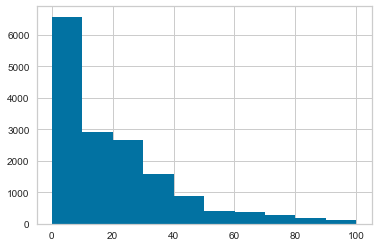

In [15]:
df.usd_price.hist()

### Check each feature column for outliers

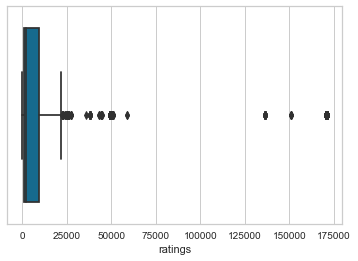

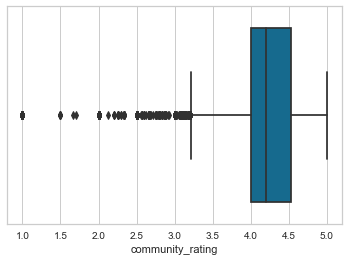

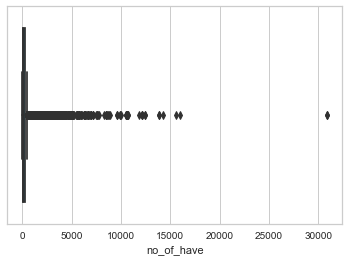

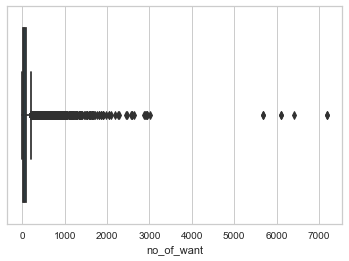

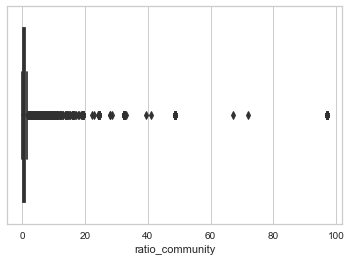

TypeError: Horizontal orientation requires numeric `x` variable.

In [16]:
for val in df.columns:
    sns.boxplot(df[val])
    plt.show()

In [ ]:
for c in df:
    plt.figure(figsize=(10,5))
    plt.hist(df[c])
    plt.title(c)
    plt.show();

In [ ]:
#df[['tracks']].boxplot()
df[['no_of_have']].boxplot()
#df[['ratings']].boxplot()
#df[['no_of_want']].boxplot()


plt.show()

In [17]:
df.shape

(15946, 16)

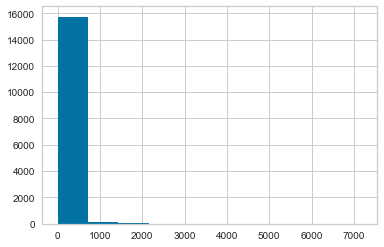

In [18]:
#df.tracks.hist()
#df.no_of_have.hist()
#df.ratings.hist()
df.no_of_want.hist()


plt.show()

In [19]:
#manually dropping ratings above 125

df.drop(df[(df.tracks > 125)].index, inplace=True)

In [20]:
#manually dropping above 7000
df.drop(df[(df.ratings > 7000)].index, inplace=True)

In [21]:
#manually dropping above 20 000
df.drop(df[(df.no_of_have > 20000)].index, inplace=True)

In [22]:
#manually dropping ratings above 4000
df.drop(df[(df.no_of_want > 4000)].index, inplace=True)

In [23]:
summary = df.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))#round it to 2 decimal places
summary

,count,mean,std,min,25%,50%,75%,max,iqr
ratings,10927.0,1387.22,1352.277244,2.00,333.00,797.00,2150.00,6998.0,1817.00
community_rating,10927.0,4.16,0.544000,1.00,3.94,4.20,4.50,5.0,0.56
no_of_have,10927.0,302.96,795.561680,1.00,32.00,93.00,262.00,15987.0,230.00
no_of_want,10927.0,92.96,180.625786,1.00,12.00,35.00,97.00,3022.0,85.00
ratio_community,10927.0,1.51,7.637441,0.00,0.17,0.35,0.75,97.0,0.58
av_seller_rating,10927.0,99.45,1.638896,50.00,99.60,100.00,100.00,100.0,0.40
year,10927.0,1865.88,489.177161,0.00,1979.00,1991.00,2005.00,2021.0,26.00
record_age,10927.0,25.28,17.088992,0.00,8.00,26.00,39.00,72.0,31.00
tracks,10927.0,6.85,6.237463,1.00,2.00,5.00,10.00,119.0,8.00
b_side,10927.0,0.69,0.460902,0.00,0.00,1.00,1.00,1.0,1.00


In [24]:
df.shape

(10927, 16)

# Preprocessing data for machine learning algorithm

### Adjusting feature values

In [25]:
df['no_of_records'].value_counts()

1         9795
2          977
3           77
4           26
BoxSet      19
Other        9
5            9
6            8
10           4
9            1
8            1
7            1
Name: no_of_records, dtype: int64

In [26]:
#in order to make this all numerical column, I have decided to impute BoxSet with most popular numerical value that represents multiple vinyls
df['no_of_records'] = df['no_of_records'].replace('BoxSet',2)

#in order to make this all numerical column, I have decided to impute Other with most popular numerical value overall
df['no_of_records'] = df['no_of_records'].replace('Other',1)

In [27]:
#changing it into numerical column
df['no_of_records'] = df['no_of_records'].astype(int)

In [28]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10927 entries, 0 to 16674
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ratings           10927 non-null  int64  
 1   community_rating  10927 non-null  float64
 2   no_of_have        10927 non-null  int64  
 3   no_of_want        10927 non-null  int64  
 4   ratio_community   10927 non-null  float64
 5   record_condition  10927 non-null  object 
 6   sleeve_condition  10740 non-null  object 
 7   av_seller_rating  10927 non-null  float64
 8   year              10927 non-null  int64  
 9   record_age        10927 non-null  int64  
 10  genre             10927 non-null  object 
 11  tracks            10927 non-null  int64  
 12  b_side            10927 non-null  int64  
 13  no_of_records     10927 non-null  int64  
 14  format_           10927 non-null  object 
 15  usd_price         10927 non-null  float64
dtypes: float64(4), int64(8), object(4)
memor

In [29]:
df['no_of_records'].value_counts()

1     9804
2      996
3       77
4       26
5        9
6        8
10       4
7        1
9        1
8        1
Name: no_of_records, dtype: int64

In [30]:
#drop values that are not occurring often
df.drop(df[(df.no_of_records > 6)].index, inplace=True)

In [31]:
df.shape

(10920, 16)

### From cleaning section, some categorical values were not cleaned from NaNs to allow to do this now

In [32]:
# Check for null values
[col for col, val in df.isnull().any().items() if val]

['sleeve_condition']

In [33]:
df['sleeve_condition'].value_counts()

Very Good Plus (VG+)    3801
Near Mint (NM or M-)    2248
Mint (M)                1695
Generic                 1437
Very Good (VG)          1106
Good Plus (G+)           194
Poor (P)                  83
Good (G)                  70
No Cover                  66
Fair (F)                  33
Name: sleeve_condition, dtype: int64

In [34]:
#fill empty values with most common values
df['sleeve_condition'] = df['sleeve_condition'].replace(np.nan,'Very Good Plus (VG+)')

In [35]:
df.shape

(10920, 16)

# Separate data into numeric and categorical

In [36]:
x_cat = df.select_dtypes(np.object)
x_num = df.select_dtypes(np.number)

In [37]:
# moving b_side over to categorical data as it is binary 
x_cat['b_side'] = x_num['b_side'].astype(object)

In [38]:
x_num.drop(['b_side'], axis=1, inplace=True)

In [39]:
x_cat.head()

,record_condition,sleeve_condition,genre,format_,b_side
0,Very Good (VG),Generic,Electronic,Other,1
1,Near Mint (NM or M-),Very Good Plus (VG+),Electronic,LP,1
2,Mint (M),Mint (M),Electronic,"7""",0
3,Very Good Plus (VG+),Near Mint (NM or M-),Electronic,Other,0
4,Mint (M),Generic,Electronic,"12""",1


In [40]:
x_num.head()

,ratings,community_rating,no_of_have,no_of_want,ratio_community,av_seller_rating,year,record_age,tracks,no_of_records,usd_price
0,1992,4.17,327,100,0.31,99.8,2004,17,5,2,8.92
1,1776,4.67,19,32,1.68,100.0,1996,25,9,1,80.77
2,33,4.00,32,25,0.78,100.0,2018,3,2,1,83.18
3,438,4.34,540,185,0.34,100.0,2000,21,4,2,11.89
4,545,3.80,39,15,0.38,99.8,1998,23,1,1,2.08


# Check for correlation between features

In [41]:
#list correlation between usd_price vs other features to see which features have highest impact on the price
df.corr()['usd_price'].sort_values(ascending=False)

usd_price           1.000000
community_rating    0.301739
no_of_want          0.284613
tracks              0.232648
no_of_records       0.144997
b_side              0.131615
no_of_have          0.078258
av_seller_rating    0.069969
ratings             0.050166
ratio_community     0.047234
year                0.027344
record_age         -0.160470
Name: usd_price, dtype: float64

TAKEAWAYS: 
-It seems that no_of_want has highest impact on usd_price
- there is negative correlation between the age of the record and its price, meaning records get more expensive as they age

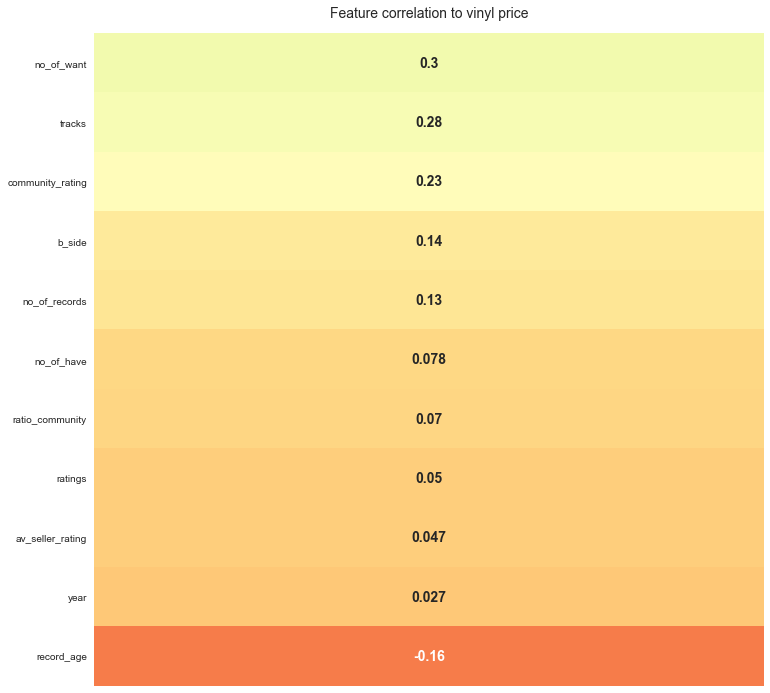

In [42]:
# Correlation viewed related to asking price
corr_series = (df.corr()[["usd_price"]]
               .sort_values(by="usd_price", ascending=False))
names = [
'no_of_want',
'tracks',
'community_rating',
'b_side',
'no_of_records',
'no_of_have',
'ratio_community',
'ratings',
'av_seller_rating',
'year',
'record_age']

fig, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr_series[1:12], 
                      vmin=-.5, 
                      vmax=1, 
                      annot=True, 
                      cmap='RdYlGn', 
                      cbar=False, 
                      xticklabels=False, 
                      yticklabels=names[:12],
                      annot_kws={'fontsize':14, 
                                 'weight': 'bold'} 
                     )
heatmap.set_title("Feature correlation to vinyl price", 
                  fontdict={'fontsize':14}, 
                  pad=16);

## Heatmap for entire dataset

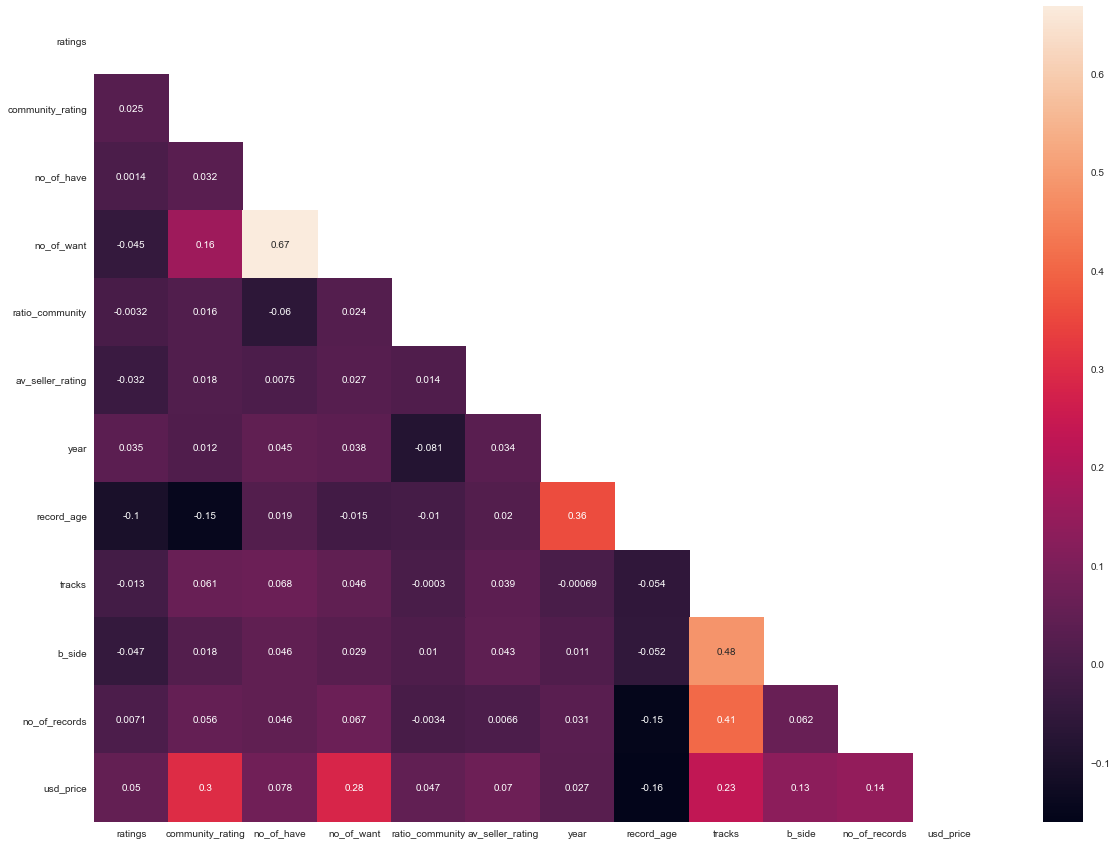

In [43]:
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

TAKEAWAYS: 
- no_of_have & no_of_want have a high correlation with each other. The indication that a record is more desirable also means it is more expensive
- tracks is correlated with no_of_records and b_side, which is understandable as they have a relationship between each other
- based on this will not drop any further columns

## Exploring Numerical columns

### Distribution Plots

#### Show actual distribution and potential log transformation distribution side-by-side

In [44]:
def distribution_plot(data,column):
    power = PowerTransformer(method='yeo-johnson', standardize=True)
    data_trans = power.fit_transform(data[column].values.reshape(-1,1))
    data_trans = [item[0] for item in data_trans]
    data_log = data[column].apply(lambda x: np.log(x) if(x>0) else x)  ## Fix this function to not get infs 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))
   
    sns.distplot(data[column], ax=ax1)
    ax1.set_title('Actual Distribution')
    sns.distplot(data_log, ax=ax2)
    ax2.set_title('Log Transformation')

    plt.show()

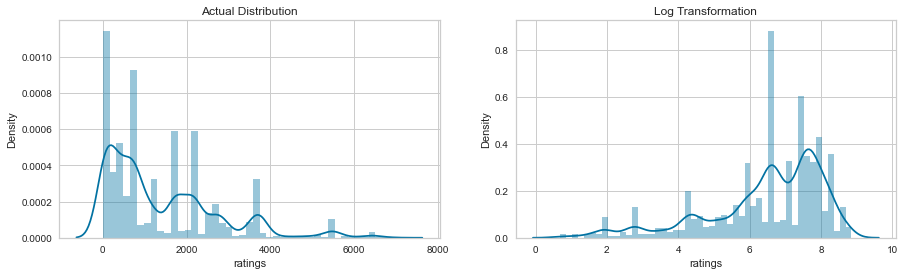

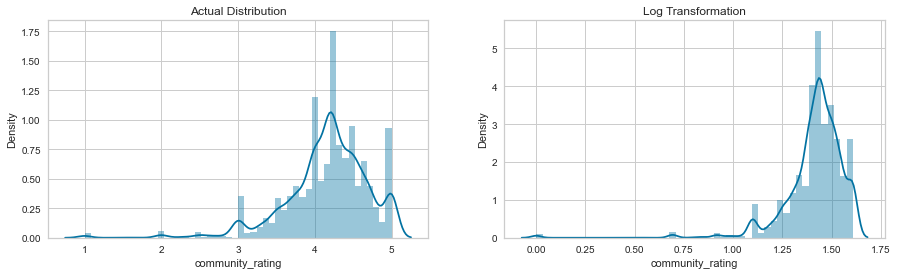

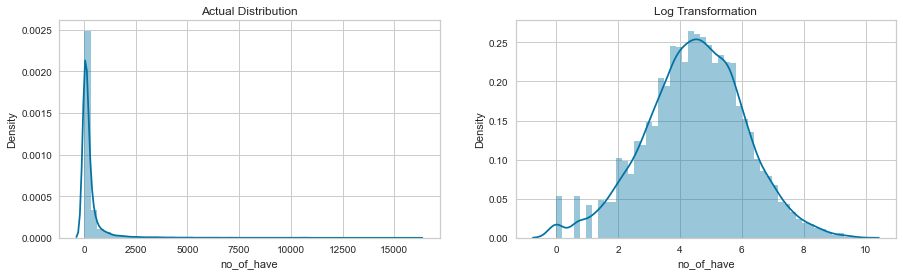

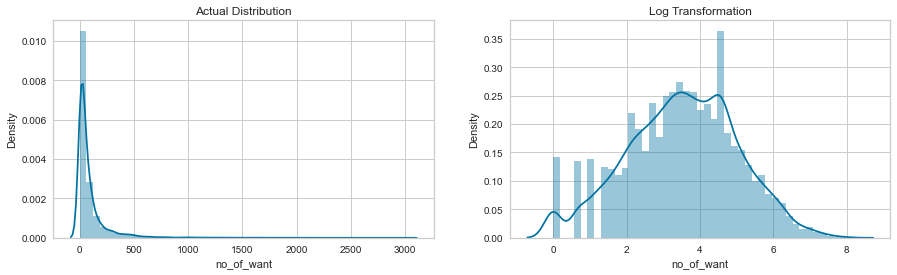

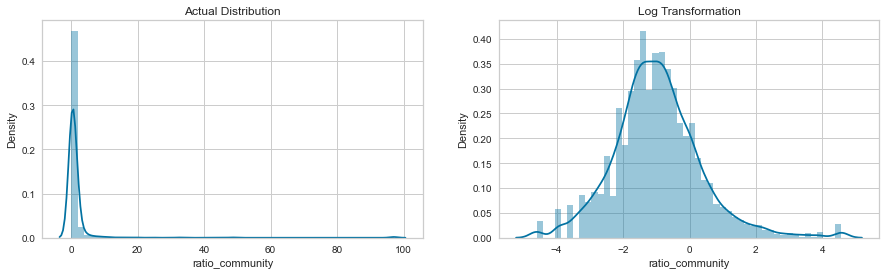

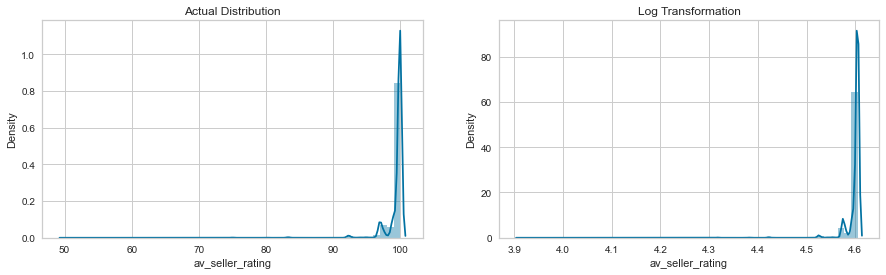

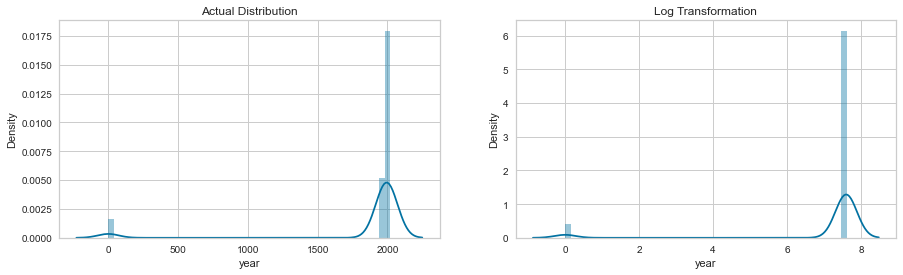

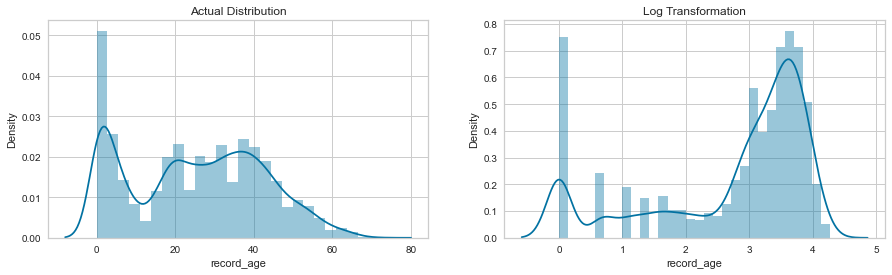

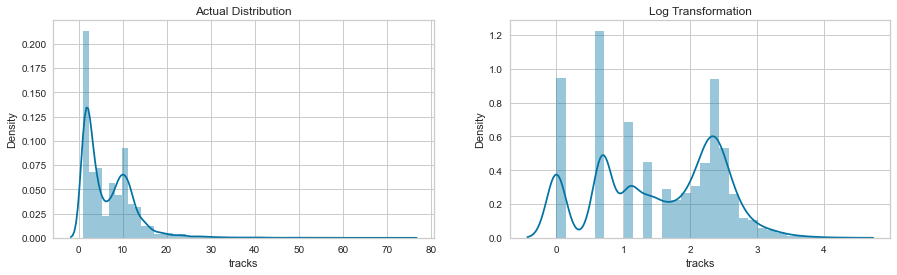

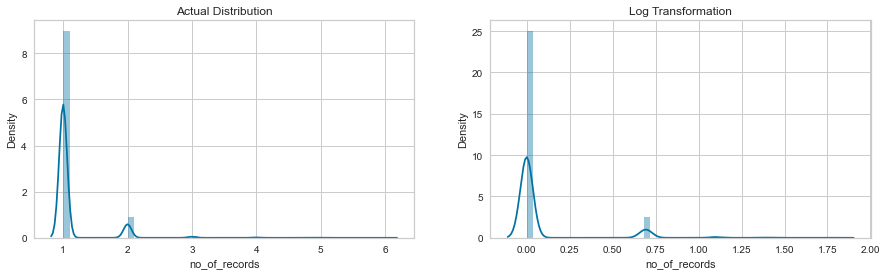

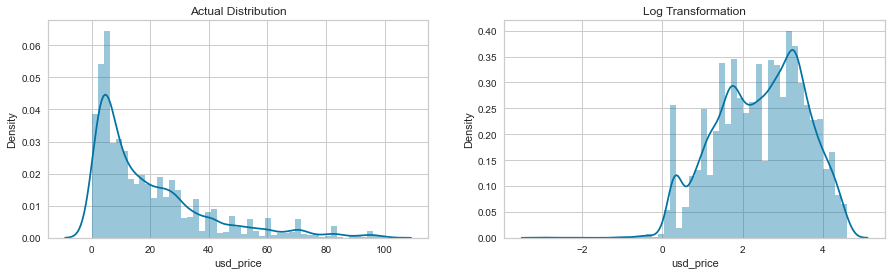

In [45]:
for val in x_num.columns:
    distribution_plot(x_num,val)

In [46]:
apply_log = ['no_of_have', 'no_of_have','ratio_community','record_age','tracks']

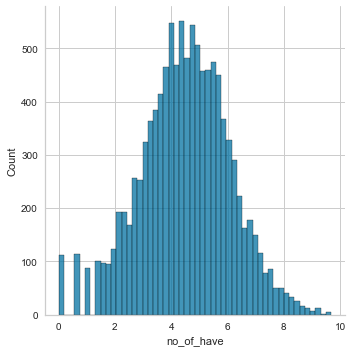

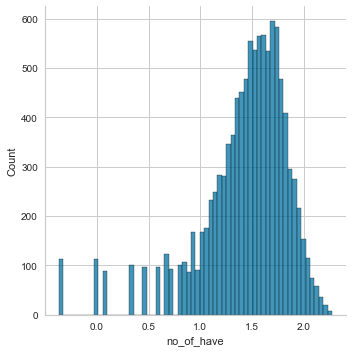

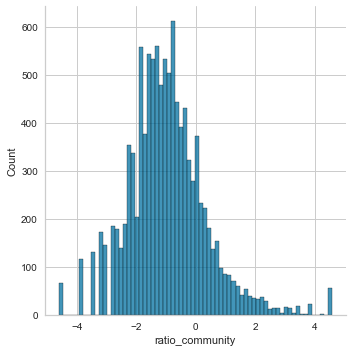

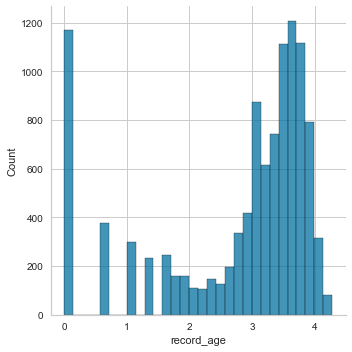

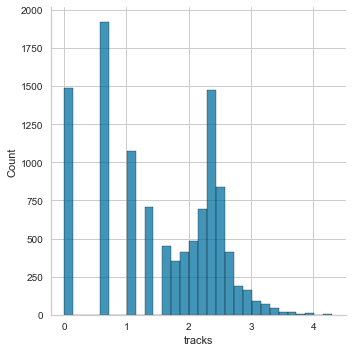

In [47]:
for column in apply_log:
    x_num[column] = x_num[column].apply(lambda x: np.log(x) if(x>0) else x)
    sns.displot(x_num[column])

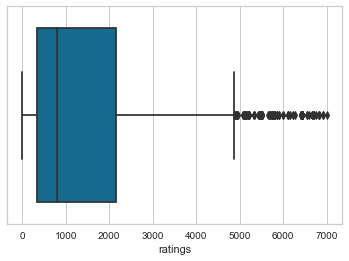

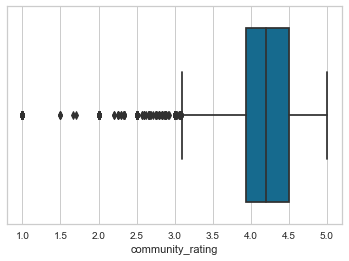

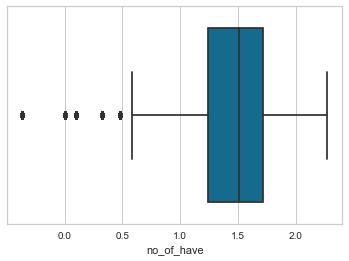

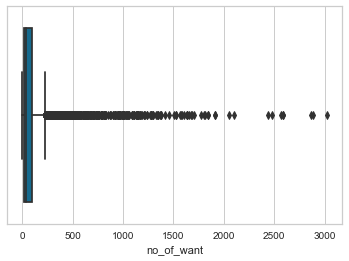

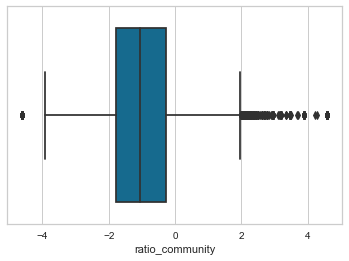

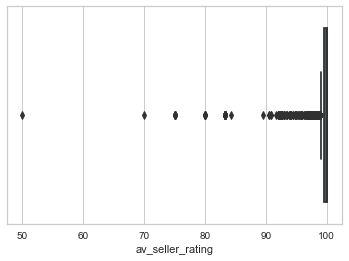

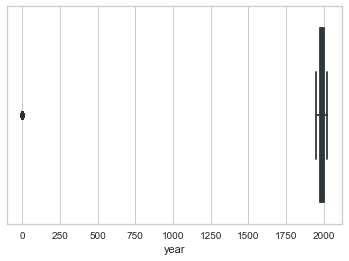

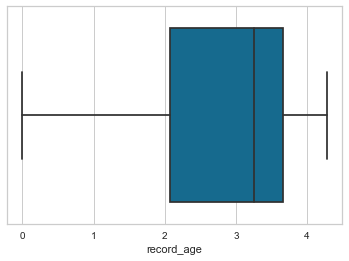

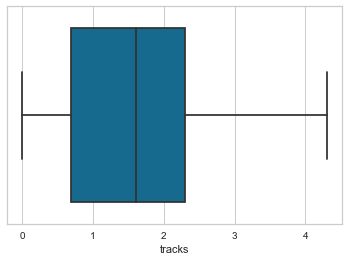

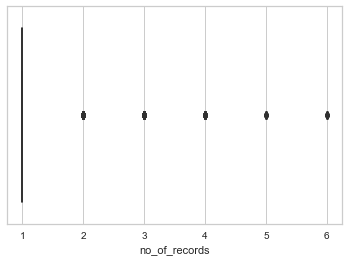

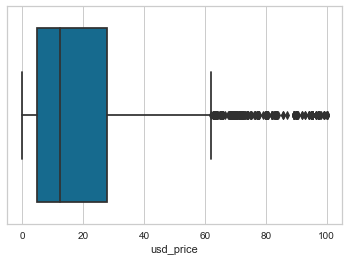

In [48]:
#check for outliers and how the log transformer worked
for val in x_num.columns:
    sns.boxplot(x_num[val])
    plt.show()

In [49]:
def my_heatMap(data, columns):
    correlations_matrix = data[columns].corr()
    mask = np.zeros_like(correlations_matrix)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
    plt.show()

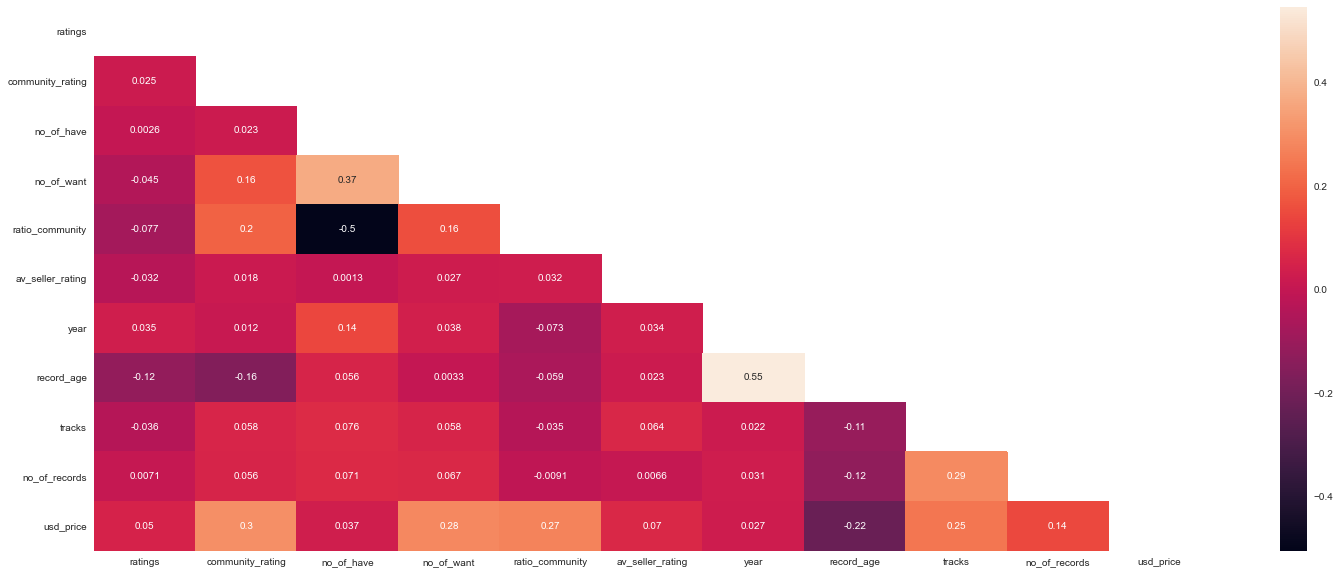

In [50]:
my_heatMap(x_num,x_num.columns)

# Working on categorical columns

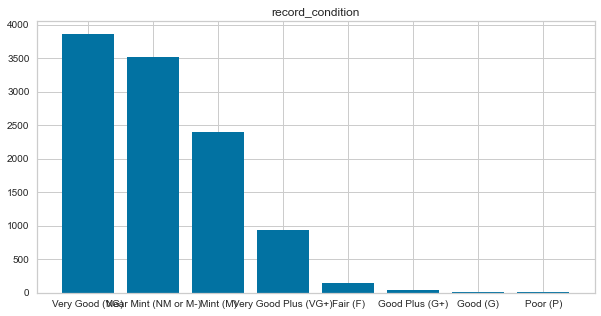

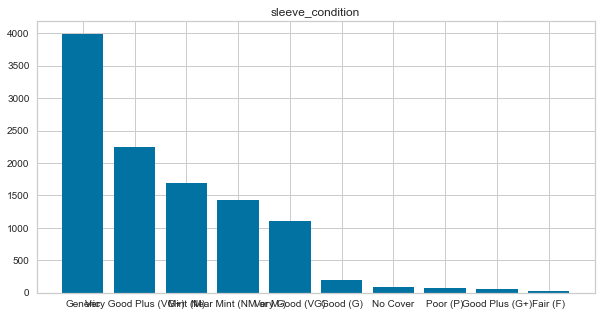

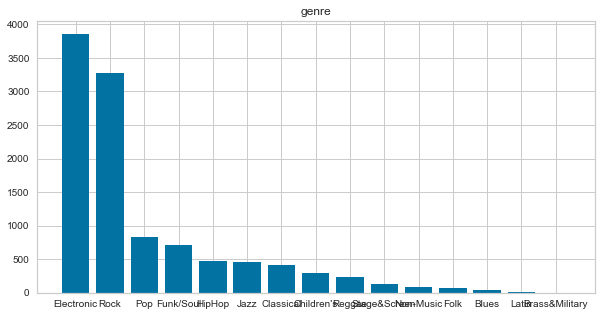

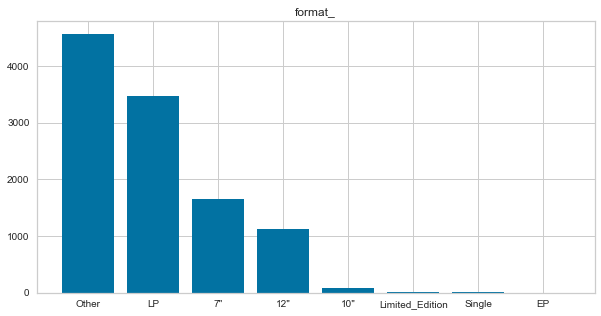

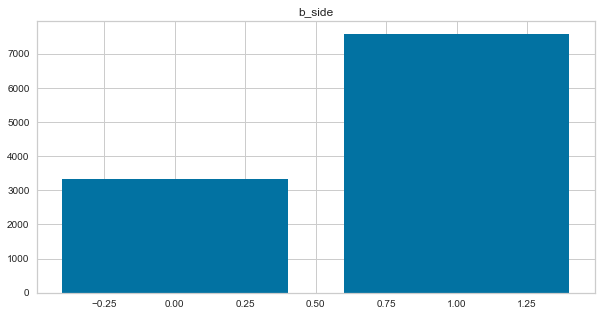

KeyError: 'record_condition_encoded'

<Figure size 720x360 with 0 Axes>

In [56]:
for c in x_cat:
    plt.figure(figsize=(10,5))
    plt.bar(df[c].unique(), df[c].value_counts())
    plt.title(c)
    plt.show();

In [ ]:
x_cat['record_condition_encoded'] = x_cat['record_condition'].map({'Poor (P)':0, 
                                                                'Fair (F)':1, 
                                                                'Good (G)':2,
                                                                'Good Plus (G+)':3,
                                                                'Very Good (VG)':4,
                                                                'Very Good Plus (VG+)':5,
                                                                'Near Mint (NM or M-)':6,
                                                                'Mint (M)':7
                                                               })
x_cat['record_condition_encoded'].value_counts()

In [ ]:
x_cat['sleeve_condition_encoded'] = x_cat['sleeve_condition'].map({'No Cover':0,
                                                                'Generic':1,
                                                                'Poor (P)':2, 
                                                                'Fair (F)':3, 
                                                                'Good (G)':4, 
                                                                'Good Plus (G+)':5,
                                                                'Very Good (VG)':6,
                                                                'Very Good Plus (VG+)':7,
                                                                'Near Mint (NM or M-)':8,
                                                                'Mint (M)':9
                                                               })
x_cat['sleeve_condition_encoded'].value_counts()

In [57]:
#check if encoding worked
x_cat.isna().sum()

record_condition            0
sleeve_condition            0
genre                       0
format_                     0
b_side                      0
record_condition_encoded    0
sleeve_condition_encoded    0
dtype: int64

In [58]:
x_cat.head()

,record_condition,sleeve_condition,genre,format_,b_side,record_condition_encoded,sleeve_condition_encoded
0,Very Good (VG),Generic,Electronic,Other,1,4,1
1,Near Mint (NM or M-),Very Good Plus (VG+),Electronic,LP,1,6,7
2,Mint (M),Mint (M),Electronic,"7""",0,7,9
3,Very Good Plus (VG+),Near Mint (NM or M-),Electronic,Other,0,5,8
4,Mint (M),Generic,Electronic,"12""",1,7,1


In [59]:
#drop the original not encoded columns and assign the rest to a new variable before using OneHotEncoder
x_cat.drop(['record_condition','sleeve_condition'], axis=1, inplace=True)

In [60]:
x_cat

,genre,format_,b_side,record_condition_encoded,sleeve_condition_encoded
0,Electronic,Other,1,4,1
1,Electronic,LP,1,6,7
2,Electronic,"7""",0,7,9
3,Electronic,Other,0,5,8
4,Electronic,"12""",1,7,1
...,...,...,...,...,...
16670,Rock,"7""",0,5,6
16671,Electronic,LP,1,5,7
16672,Electronic,"12""",0,6,8
16673,Classical,Other,1,6,8


In [61]:
x_cat_copy = x_cat[['genre','format_']]

In [62]:
x_cat.drop(['genre','format_'], axis=1, inplace=True)

In [63]:
#only ordinal encoded categorical
x_cat

,b_side,record_condition_encoded,sleeve_condition_encoded
0,1,4,1
1,1,6,7
2,0,7,9
3,0,5,8
4,1,7,1
...,...,...,...
16670,0,5,6
16671,1,5,7
16672,0,6,8
16673,1,6,8


In [64]:
# categoricals to put through OneHotEncoder
x_cat_copy

,genre,format_
0,Electronic,Other
1,Electronic,LP
2,Electronic,"7"""
3,Electronic,Other
4,Electronic,"12"""
...,...,...
16670,Rock,"7"""
16671,Electronic,LP
16672,Electronic,"12"""
16673,Classical,Other


In [65]:
#scaling ordinal encoded values

scaler = preprocessing.StandardScaler().fit(x_cat)
ordinal_encoded_scaled = scaler.transform(x_cat)
ordinal_encoded_scaled = pd.DataFrame(ordinal_encoded_scaled)

In [66]:
ordinal_encoded_scaled

,0,1,2
0,0.664088,-1.615285,-2.226051
1,0.664088,0.366838,0.211989
2,-1.505824,1.357899,1.024669
3,-1.505824,-0.624223,0.618329
4,0.664088,1.357899,-2.226051
...,...,...,...
10915,-1.505824,-0.624223,-0.194351
10916,0.664088,-0.624223,0.211989
10917,-1.505824,0.366838,0.618329
10918,0.664088,0.366838,0.618329


### Applying OneHotEncoder on the rest of categorical features

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoded_df = pd.DataFrame(encoder.fit_transform(x_cat_copy).toarray())

In [68]:
encoded_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10918,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
cat_data = pd.concat([ordinal_encoded_scaled, encoded_df], axis=1)

In [70]:
cat_data

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.664088,-1.615285,-2.226051,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.664088,0.366838,0.211989,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.505824,1.357899,1.024669,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.505824,-0.624223,0.618329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.664088,1.357899,-2.226051,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,-1.505824,-0.624223,-0.194351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10916,0.664088,-0.624223,0.211989,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10917,-1.505824,0.366838,0.618329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10918,0.664088,0.366838,0.618329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
#cat_data.drop(['genre','style','format_'], axis=1, inplace=True)

# Split X and Y

In [72]:
y = x_num['usd_price']
x_num = x_num.drop(['usd_price'],axis = 1)

In [73]:
x_num

,ratings,community_rating,no_of_have,no_of_want,ratio_community,av_seller_rating,year,record_age,tracks,no_of_records
0,1992,4.17,1.756125,100,-1.171183,99.8,2004,2.833213,1.609438,2
1,1776,4.67,1.079918,32,0.518794,100.0,1996,3.218876,2.197225,1
2,33,4.00,1.242925,25,-0.248461,100.0,2018,1.098612,0.693147,1
3,438,4.34,1.839211,185,-1.078810,100.0,2000,3.044522,1.386294,2
4,545,3.80,1.298436,15,-0.967584,99.8,1998,3.135494,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
16670,2969,3.00,1.142787,97,1.439835,100.0,2008,2.564949,0.000000,1
16671,2969,4.22,1.324738,46,0.067659,100.0,1989,3.465736,1.609438,1
16672,2969,3.45,1.678327,11,-2.995732,100.0,2006,2.708050,0.693147,1
16673,2969,3.71,1.664533,13,-2.659260,100.0,1979,3.737670,2.484907,3


# Concatenate numerical and categorical x features

In [74]:
df = pd.concat([x_num.reset_index(drop=True), cat_data.reset_index(drop=True)], axis=1)
df.head(6)

,ratings,community_rating,no_of_have,no_of_want,ratio_community,av_seller_rating,year,record_age,tracks,no_of_records,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1992,4.17,1.756125,100,-1.171183,99.8,2004,2.833213,1.609438,2,0.664088,-1.615285,-2.226051,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1776,4.67,1.079918,32,0.518794,100.0,1996,3.218876,2.197225,1,0.664088,0.366838,0.211989,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,4.00,1.242925,25,-0.248461,100.0,2018,1.098612,0.693147,1,-1.505824,1.357899,1.024669,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,438,4.34,1.839211,185,-1.078810,100.0,2000,3.044522,1.386294,2,-1.505824,-0.624223,0.618329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,545,3.80,1.298436,15,-0.967584,99.8,1998,3.135494,0.000000,1,0.664088,1.357899,-2.226051,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100,3.67,0.583198,1,-1.771957,100.0,1984,3.610918,1.945910,1,0.664088,-0.624223,0.211989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
df.shape

(10920, 34)

# Split Train & Test Data

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state=100)

# Scale data

## Using StandardScaler

In [77]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
x_scaled = pd.DataFrame(X_train)

x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1.018989,-2.124869,-0.251392,-0.502439,-1.521167,-0.308837,0.229331,0.856992,-0.907999,-0.297703,-1.512178,0.363719,0.209613,-0.021403,-0.044156,-0.155789,-0.737199,-0.169865,-0.212664,-0.264695,-0.284230,-0.107608,-0.085229,4.802720,-0.202463,-0.652014,-0.087913,-0.685540,2.385189,-0.021403,-0.850139,-0.037088,-0.336378,-0.018534
1,3.035938,0.540212,1.384919,2.346029,-0.305289,-1.130324,-3.737730,-2.177441,0.081437,-0.297703,-1.512178,1.359784,0.616451,-0.021403,-0.044156,6.418948,-0.737199,-0.169865,-0.212664,-0.264695,-0.284230,-0.107608,-0.085229,-0.208215,-0.202463,-0.652014,-0.087913,-0.685540,2.385189,-0.021403,-0.850139,-0.037088,-0.336378,-0.018534
2,-0.745009,1.551104,-0.701732,-0.094717,1.703394,0.336617,-3.737730,-2.177441,-1.656479,-0.297703,-1.512178,-2.624477,0.209613,-0.021403,-0.044156,-0.155789,-0.737199,-0.169865,-0.212664,-0.264695,-0.284230,-0.107608,-0.085229,-0.208215,4.939165,-0.652014,-0.087913,-0.685540,2.385189,-0.021403,-0.850139,-0.037088,-0.336378,-0.018534
3,0.590748,-1.205876,-0.110757,-0.418661,-0.095547,-1.423712,0.259460,0.544204,-1.656479,-0.297703,-1.512178,0.363719,0.209613,-0.021403,-0.044156,-0.155789,-0.737199,-0.169865,-0.212664,-0.264695,-0.284230,-0.107608,-0.085229,-0.208215,4.939165,-0.652014,-0.087913,1.458705,-0.419254,-0.021403,-0.850139,-0.037088,-0.336378,-0.018534
4,-0.448421,-0.286882,0.749411,-0.245519,-0.691201,0.277940,0.279546,0.235530,0.081437,-0.297703,0.661298,-0.632346,-2.231416,-0.021403,-0.044156,-0.155789,-0.737199,-0.169865,-0.212664,3.777926,-0.284230,-0.107608,-0.085229,-0.208215,-0.202463,-0.652014,-0.087913,1.458705,-0.419254,-0.021403,-0.850139,-0.037088,-0.336378,-0.018534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,-0.159229,1.551104,-1.162180,-0.502439,-0.596644,0.336617,0.263477,0.491347,0.444769,-0.297703,0.661298,1.359784,1.023289,-0.021403,-0.044156,-0.155789,-0.737199,-0.169865,-0.212664,-0.264695,-0.284230,-0.107608,-0.085229,-0.208215,-0.202463,1.533709,-0.087913,-0.685540,-0.419254,-0.021403,1.176278,-0.037088,-0.336378,-0.018534
8732,-0.551968,1.220267,0.596611,-0.256689,-0.437007,0.336617,0.319719,-2.177441,0.588960,-0.297703,0.661298,0.363719,0.616451,-0.021403,-0.044156,-0.155789,-0.737199,-0.169865,4.702245,-0.264695,-0.284230,-0.107608,-0.085229,-0.208215,-0.202463,-0.652014,-0.087913,-0.685540,-0.419254,-0.021403,1.176278,-0.037088,-0.336378,-0.018534
8733,-0.577115,0.172614,-0.208688,-0.066791,1.194414,0.219262,0.319719,-2.177441,0.081437,-0.297703,0.661298,0.363719,0.209613,-0.021403,-0.044156,-0.155789,1.356485,-0.169865,-0.212664,-0.264695,-0.284230,-0.107608,-0.085229,-0.208215,-0.202463,-0.652014,-0.087913,-0.685540,-0.419254,-0.021403,1.176278,-0.037088,-0.336378,-0.018534
8734,3.035198,0.080715,-1.566014,-0.485684,0.380871,-1.130324,0.315702,-1.306723,1.193249,-0.297703,0.661298,1.359784,0.616451,-0.021403,-0.044156,-0.155789,-0.737199,-0.169865,-0.212664,-0.264695,3.518274,-0.107608,-0.085229,-0.208215,-0.202463,-0.652014,-0.087913,-0.685540,-0.419254,-0.021403,1.176278,-0.037088,-0.336378,-0.018534


In [78]:
#for i in range(x_scaled.shape[1]):
#    sns.distplot(x_scaled[i])
#    plt.show()

# Implement models

In [81]:
def models_automation(models, X_train, y_train, X_test, y_test):
    lis = []
    lis1 = []
    for i,model in enumerate(models):
        lis.append([])
        lis1.append([])
        model.fit(X_train, y_train)
        print(f"{str(model)}: Test -> {model.score(X_test, y_test)}")
        lis[i].append(model.score(X_test, y_test))
        y_predict = model.predict(X_test)
        lis1[i].append(list(y_predict))
        lis[i].append(mean_absolute_error(y_test,y_predict))
        lis[i].append(mean_squared_error(y_test,y_predict))
        lis[i].append(mean_squared_error(y_test, y_predict, squared=False))
    return lis,lis1

In [82]:
model1 = linear_model.LinearRegression()
model2 = KNeighborsRegressor(7)
model3 = RandomForestRegressor(random_state=0)
linear_models = [model1,model2,model3]
my_list,my_list1 = models_automation(linear_models, X_train, y_train, X_test, y_test)

LinearRegression(): Test -> 0.3922435328300329
KNeighborsRegressor(n_neighbors=7): Test -> 0.4050927945954036
RandomForestRegressor(random_state=0): Test -> 0.6180078789344272


# Scores of each model applied

In [83]:
def my_scores(lis):
    results = pd.DataFrame(lis,columns = ['R_squared', 'MAE','MSE','RMSE'])
    results.insert(0,'Models',['Linear Regression', 'KNneighborsRegressor', 'RandomForestRegressor'])
    results = results.T
    return results

In [84]:
data1 = my_scores(my_list)
data1.head()

,0,1,2
Models,Linear Regression,KNneighborsRegressor,RandomForestRegressor
R_squared,0.392244,0.405093,0.618008
MAE,10.9916,10.2332,7.83666
MSE,244.66,239.488,153.776
RMSE,15.6416,15.4754,12.4006


In [85]:
def visualize_model(plot, model, train, test):
    visualizer = plot(model)
    visualizer.fit(*train)
    visualizer.score(*test)
    visualizer.show()

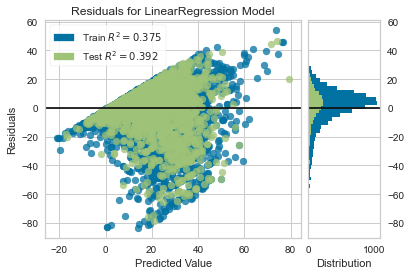

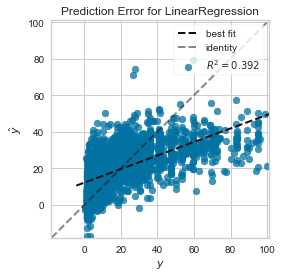

In [86]:
for i, plot in enumerate([ResidualsPlot, PredictionError]):
    visualize_model(plot, model1, (X_train, y_train), (X_test, y_test))

# Actual prices compared to predicted prices

In [87]:
predicted_val= pd.DataFrame({'Actual_price': y_test,'LinearRegression': my_list1[0][0],
                             'KNeighborsRegressor': my_list1[1][0],
                             'RandomForestRegressor':
                             my_list1[2][0]})
predicted_val[['LinearRegression','KNeighborsRegressor','RandomForestRegressor']] = predicted_val[
    ['LinearRegression','KNeighborsRegressor','RandomForestRegressor']
    ].astype('int64')
predicted_val

,Actual_price,LinearRegression,KNeighborsRegressor,RandomForestRegressor
14785,41.64,36,30,39
2931,10.71,19,17,14
10662,13.39,24,27,17
6608,29.75,33,30,41
756,29.74,28,44,32
...,...,...,...,...
8931,29.74,25,9,19
7747,42.82,20,30,35
853,10.00,16,9,21
14129,3.47,8,4,3


In [88]:
predicted_val.to_csv('/Users/siljaloik/Desktop/predicted_values.csv')

## Model validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
model2 = RandomForestRegressor(max_depth = 15).fit(X_train,y_train)
my_features = model2.feature_importances_
y_pred1 = model2.predict(X_test)
my_features = my_features.reshape(-1,1)
index = []
value = []
for i, val in enumerate(my_features):
    if val > 0.0:
        index.append(i)
        value.append(val)
features = {}

Rand_Forest_considered = []
for i, ii in zip(index,value):
    features[df.columns[i]] = (float(ii))
    Rand_Forest_considered.append(df.columns[i])
RF_scores = cross_val_score(model2, X_train, y_train, cv=5) #cross-validation 5 times
mean = np.mean(RF_scores)
print(Rand_Forest_considered)
print('The features weights in Random Forest model are {}'.format(features)print('The mean score of Random Forest Regressor at max_depth = 15 is {}'.format(mean))

['ratings', 'community_rating', 'no_of_have', 'no_of_want', 'ratio_community', 'av_seller_rating', 'year', 'record_age', 'tracks', 'no_of_records', 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
The features weights in Random Forest model are {'ratings': 0.13392469535589066, 'community_rating': 0.06924437038121622, 'no_of_have': 0.04810892104494013, 'no_of_want': 0.15259876168991482, 'ratio_community': 0.1465032193373842, 'av_seller_rating': 0.05118987017527782, 'year': 0.04224847874052309, 'record_age': 0.03940259414863308, 'tracks': 0.04390706727249562, 'no_of_records': 0.006174111277828172, 0: 1.9198709085061387e-05, 1: 0.0003935992400367091, 2: 0.0033418986132531577, 3: 0.007332389156442291, 4: 0.0018529387387026031, 5: 0.003412426253315412, 6: 0.0038033757474339254, 7: 0.00495404017858994, 8: 0.001076564951285105, 9: 0.00040351497250938444, 10: 0.0026882111030628406, 11: 0.002749995689972376, 12: 0.0116243973593682, 13: 0.0005544635339815723, 14